<a href="https://colab.research.google.com/github/MarkusDarkus/Data_Analytics/blob/Test_tasks/2_Generators_MONTE_CARLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd

# ДИСКРЕТНОСТИ))))

In [111]:
res=[]
for i in range(10):
  res.append(np.random.binomial(1,0.5))
res

[0, 0, 0, 1, 1, 0, 0, 1, 1, 1]

In [112]:
[np.random.binomial(1,0.5) for _ in range(10)]

[1, 0, 0, 0, 1, 1, 0, 0, 0, 0]

In [113]:
list(np.random.binomial(1,0.5,size=10))

[1, 0, 1, 0, 1, 0, 1, 1, 0, 1]

In [114]:
pd.Series([0,1]).sample(2).values[0]

1

In [115]:
def coin():
  return pd.Series([0,1]).sample(1).values[0]

In [116]:
res=[]
for i in range(10):
  res.append(coin())
res

[1, 0, 1, 1, 0, 1, 0, 0, 0, 1]

выборка с возвращением

In [117]:
pd.Series([0,1]).sample(10, replace=True).reset_index(drop=True)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    0
dtype: int64

In [118]:
pd.Series([1,2,3,4,5,6]).sample(10,replace=True).reset_index(drop=True)


0    6
1    3
2    5
3    4
4    3
5    4
6    5
7    6
8    1
9    1
dtype: int64

In [119]:
np.random.randint(1,6,size=100)

array([3, 4, 2, 5, 1, 5, 5, 1, 4, 1, 5, 3, 3, 4, 1, 3, 5, 2, 2, 4, 3, 5,
       3, 1, 1, 3, 1, 4, 4, 5, 3, 5, 4, 4, 1, 2, 4, 3, 5, 1, 2, 4, 1, 2,
       2, 4, 2, 4, 5, 5, 5, 3, 3, 5, 5, 4, 1, 2, 1, 5, 2, 3, 4, 2, 4, 3,
       5, 2, 3, 1, 1, 4, 5, 3, 5, 5, 2, 3, 2, 1, 3, 5, 2, 4, 4, 4, 4, 4,
       3, 3, 2, 1, 1, 3, 1, 5, 3, 4, 2, 3])

In [120]:
pd.Series([1]*90 + [0]*10).sample(10,replace=True)

90    0
35    1
28    1
50    1
20    1
91    0
50    1
33    1
86    1
60    1
dtype: int64

In [121]:
pd.Series(['любит',"не любит"]).sample(1)

0    любит
dtype: object

In [122]:
def chamomale():
  return pd.Series(['любит',"не любит"]).sample(1).values[0]
chamomale()

'любит'

# НЕПРЕРЫВНОСТИ)))

<Axes: >

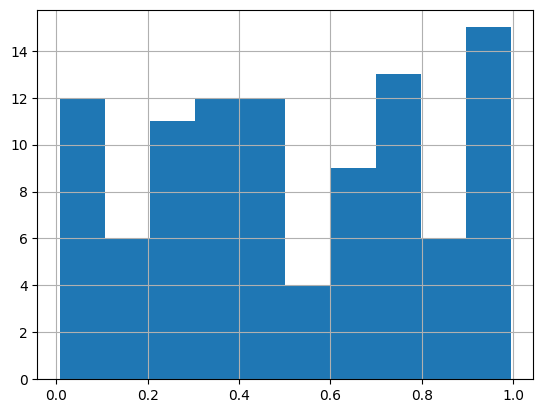

In [123]:
pd.Series(np.random.uniform(size=100)).hist() #Равномерное

<Axes: >

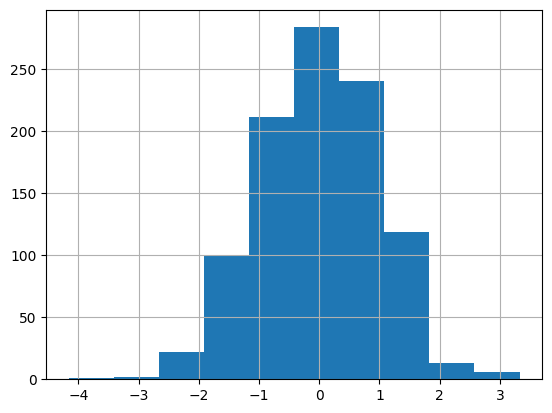

In [124]:
pd.Series(np.random.normal(size=1000)).hist() #Нормальное

<Axes: >

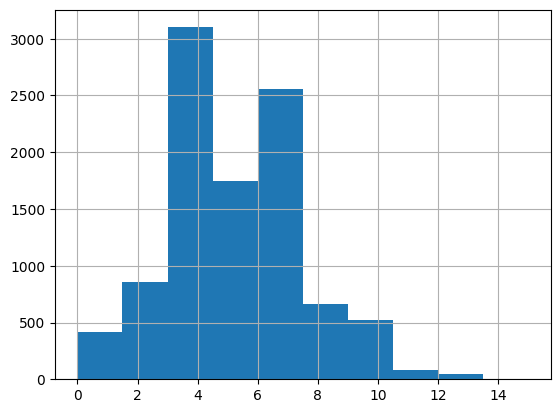

In [125]:
pd.Series(np.random.poisson(5, size=10000)).hist() #Пуассоновское

<Axes: >

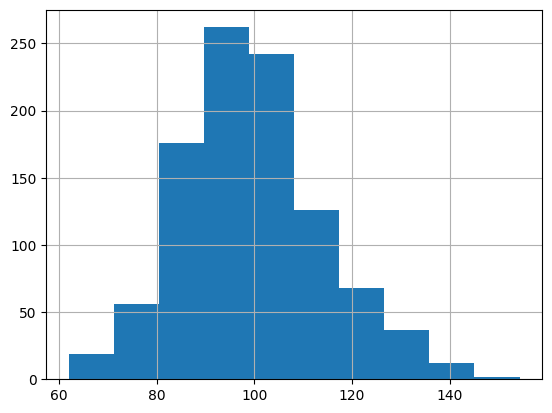

In [126]:
pd.Series(np.random.chisquare(100, size=1000)).hist()

<Axes: >

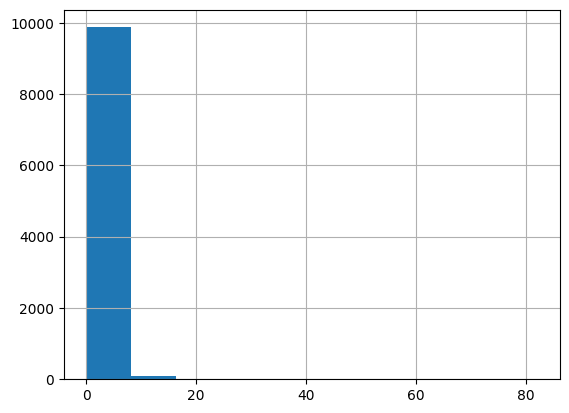

In [127]:
pd.Series(np.random.pareto(2, size=10000)).hist()

# PDF PMF CDF и другие

## PMF

In [128]:
import seaborn as sns

In [129]:
u =np.random.randint(1,7,size=1000)

<Axes: ylabel='Probability'>

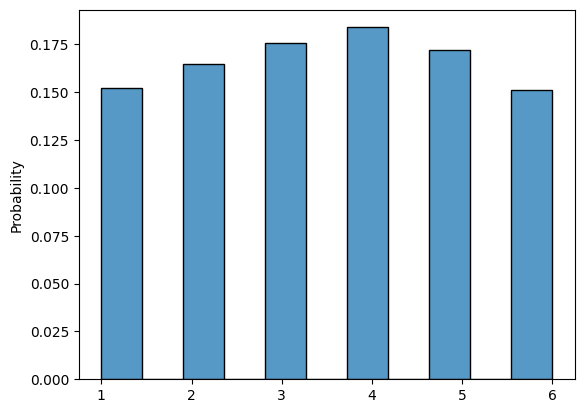

In [130]:
sns.histplot(np.random.randint(1,7,size=1000), stat='probability') # probability must function

## CDF

<Axes: ylabel='Proportion'>

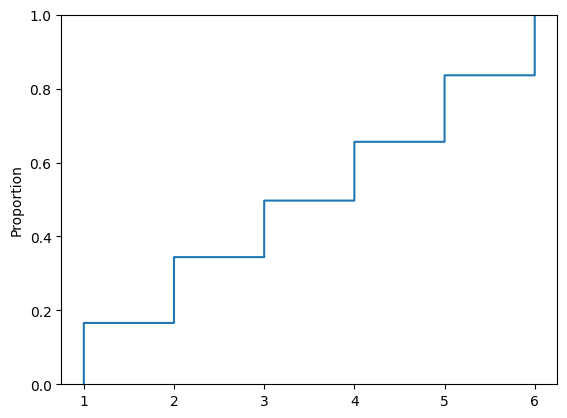

In [131]:
sns.ecdfplot(u) # probability

<Axes: ylabel='Count'>

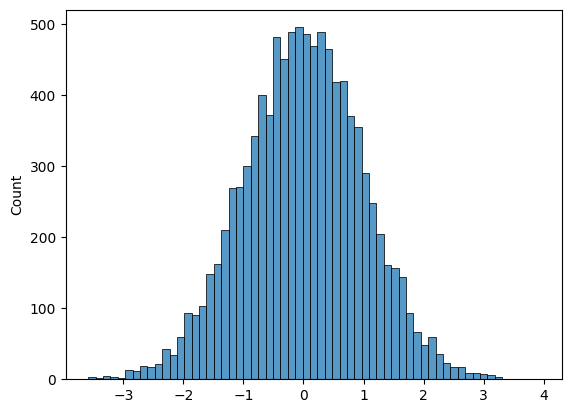

In [132]:
sns.histplot(np.random.normal(size=10000))

<Axes: ylabel='Proportion'>

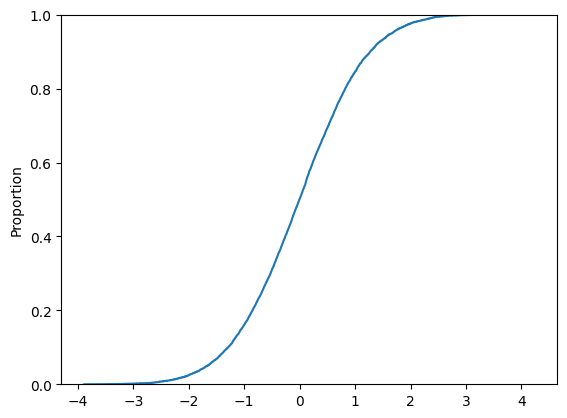

In [133]:
sns.ecdfplot(np.random.normal(size=10000))

<Axes: ylabel='Density'>

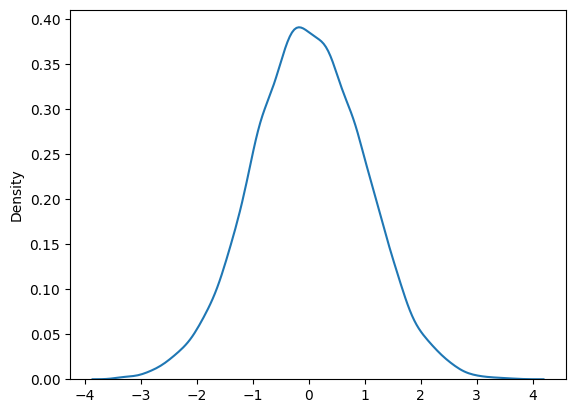

In [134]:
sns.kdeplot(np.random.normal(size=10000))

<Axes: ylabel='Proportion'>

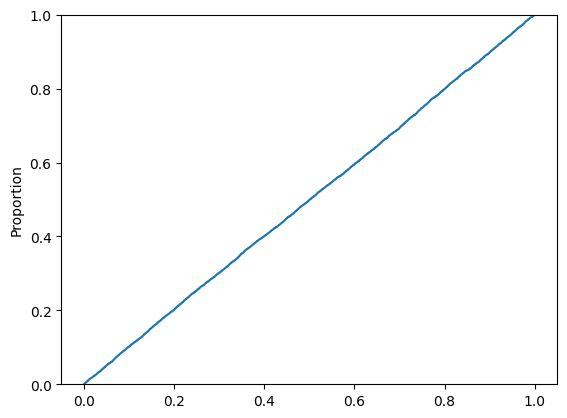

In [135]:
sns.ecdfplot(np.random.uniform(size=10000))

эти параметры помогают проверить выборку на равномерное распределение

# QQ-plot

## Проверка на нормальность распределения выборки

In [136]:
nes=np.random.normal(size=10000) # нормальное ли это распределение?

<Axes: ylabel='Count'>

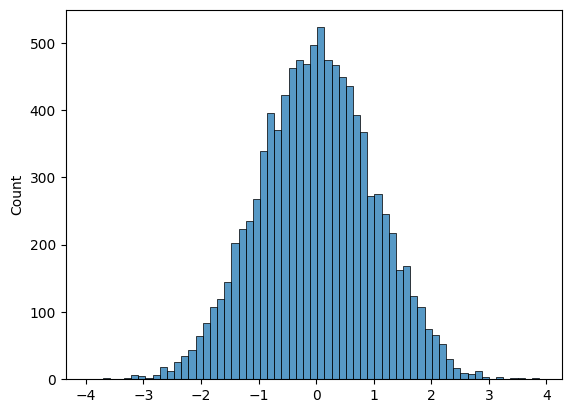

In [137]:
sns.histplot(nes)

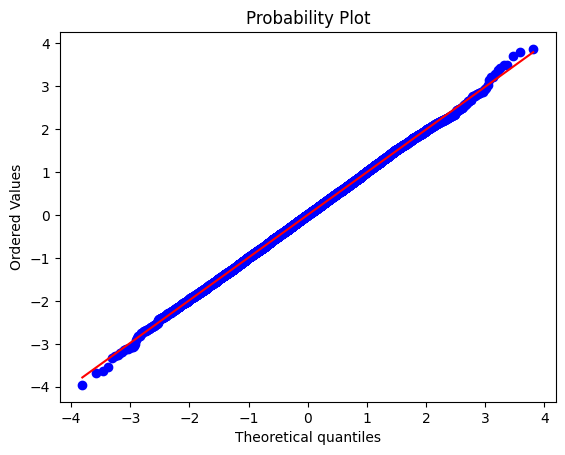

In [138]:
import pylab
import scipy.stats as stats

stats.probplot(nes, dist="norm", plot=pylab)
pylab.show()

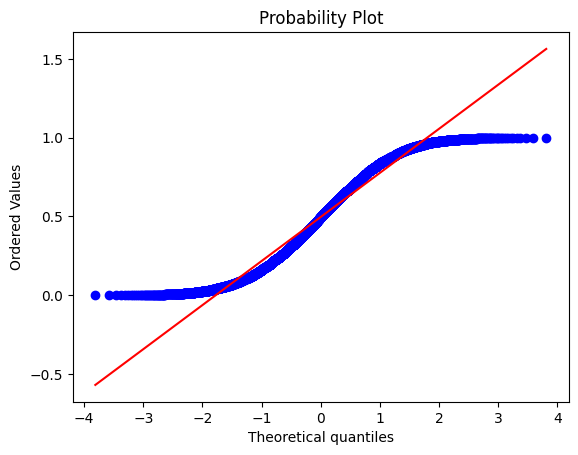

In [139]:
u2= np.random.uniform(size=10000)
stats.probplot(u2, dist="norm", plot=pylab)
pylab.show()

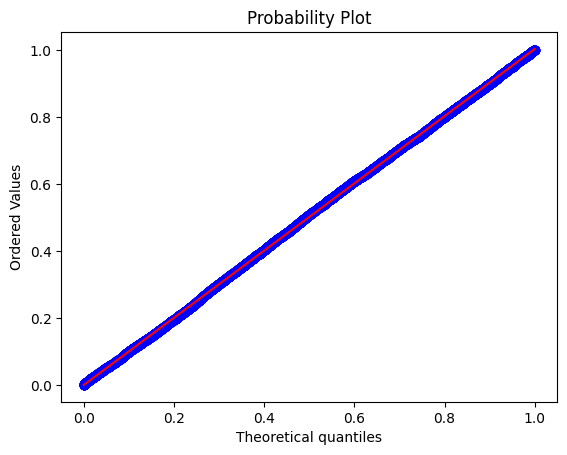

In [140]:
u2= np.random.uniform(size=10000)
stats.probplot(u2, dist="uniform", plot=pylab)
pylab.show()

# Monte_Carlo


пример: какая вероятность получить 2 орла подряд

In [146]:
np.random.binomial(1, 0.5, size=2)

array([1, 0])

In [147]:
np.random.binomial(1, 0.5, size=2).sum()

1

In [152]:
n = 1000
res=[]
for _ in range(n):
  res.append(np.random.binomial(1, 0.5, size=2).sum())

In [153]:
res[:10]

[1, 0, 2, 2, 0, 2, 2, 0, 0, 2]

In [154]:
pd.Series(res).value_counts(normalize=True)

1    0.505
2    0.250
0    0.245
dtype: float64